In [18]:
C_feature="data/stoichiometry/curlcake_C.feature.tsv"
ac4C_feature="data/stoichiometry/curlcake_ac4C.feature.tsv"


count_dict={}
with open(C_feature) as f:
    for line in f:
        contig=line.split("\t")[1]
        site=line.split("\t")[2]

        id="|".join([contig,site])
        if id not in count_dict:
            count_dict[id]=[0,0]
        count_dict[id][0]+=1

with open(ac4C_feature) as f:
    for line in f:
        contig=line.split("\t")[1]
        site=line.split("\t")[2]

        id="|".join([contig,site])
        if id not in count_dict:
            count_dict[id]=[0,0]
        count_dict[id][1]+=1        


#count_dict

In [24]:
count=0
selection_dict={}
for id in count_dict:

    if count_dict[id][0]>400 and count_dict[id][1]>400:
        count+=1
        selection_dict[id]=1
print(count)

708


In [29]:
C_feature="data/stoichiometry/curlcake_C.feature.tsv"
ac4C_feature="data/stoichiometry/curlcake_ac4C.feature.tsv"

for ratio in [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
    print(ratio)
    out=open("data/stoichiometry/mix_%s.tsv" %ratio,"w")

    unmod_dict={}
    mod_dict={}

    with open(C_feature) as f:
        for line in f:
            contig=line.split("\t")[1]
            site=line.split("\t")[2]

            id="|".join([contig,site])

            if not selection_dict.get(id,0):
                continue
            
            if id not in unmod_dict:
                unmod_dict[id]=0
            
            unmod_dict[id] +=1

            if unmod_dict[id] > 400*(1-ratio):
                continue

            out.write(line)

    with open(ac4C_feature) as f:
        for line in f:
            contig=line.split("\t")[1]
            site=line.split("\t")[2]

            id="|".join([contig,site])

            if not selection_dict.get(id,0):
                continue
            
            if id not in mod_dict:
                mod_dict[id]=0
            
            mod_dict[id] +=1

            if mod_dict[id] > 400*ratio:
                continue

            out.write(line)



    
    out.close()
    #break

0


0.05
0.1
0.15
0.2
0.25
0.3
0.35
0.4
0.45
0.5
0.55
0.6
0.65
0.7
0.75
0.8
0.85
0.9
0.95
1


In [1]:
import os

for ratio in [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
    cmd="python test_attention_predict.py \
            -feature data/stoichiometry/mix_%s.tsv \
            -out data/stoichiometry/mix_%s.prediction" %(ratio,ratio)
    os.system(cmd)


device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...
device= cpu
loading data...


In [5]:
file="data/stoichiometry/mix_0.9.prediction"

C_count=0
m5C_count=0

with open(file) as f:
    for line in f:
        line=line.rstrip()
        label=line.split("\t")[4]
        probability=float(line.split("\t")[5])
        if label == "C" and probability<0.5:
            C_count += 1
        elif probability>0.5:
            m5C_count += 1
print(m5C_count/(m5C_count+C_count))

0.8200373815895672


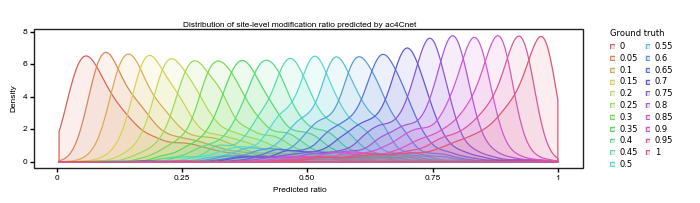

/home/yulab/anaconda3/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 7.08 x 1.8 in image.
/home/yulab/anaconda3/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/ac4C_stoichiometry_site_probability.pdf


In [51]:
#site level ratio cutoff
from plotnine import *

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"


m5C_count=[]
C_count=[]
ground_truth=[]

for ratio in [0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]:
    mod_rate_dict={}
    with open("data/stoichiometry/mix_%s.prediction" %ratio) as f:
        for j,line in enumerate(f):
                line=line.rstrip()
                id="_".join([line.split("\t")[0],line.split("\t")[1]])
                if id not in mod_rate_dict:
                    mod_rate_dict[id]=[0,0]
                if line.split("\t")[4]=="m5C":
                    mod_rate_dict[id][0]+=1
                mod_rate_dict[id][1]+=1


    for site in mod_rate_dict:
        m5C_count.append(mod_rate_dict[site][0])
        C_count.append(mod_rate_dict[site][1])
    ground_truth.extend([str(ratio)]*len(mod_rate_dict))
import pandas as pd
import numpy as np

data=pd.DataFrame({"m5C":m5C_count,"C":C_count,"Ground truth":ground_truth})
data["ratio"]=data["m5C"]/data["C"]

# calculate CDF
data = data.sort_values(by='ratio')
data['cdf'] = np.linspace(0, 1, len(data))




p=(
    ggplot() 
    #+geom_line(data, aes(x='ratio', y='cdf'),color="#F8766D")
    +geom_density(data,aes(x="ratio",group="Ground truth",color="Ground truth",fill="Ground truth"),alpha=0.1)
    +theme(figure_size=[3.54*2,1.8],
        axis_text=element_text(size=6,family="Arial",color="black"),
        axis_title_x=element_text(size=6,family="Arial",color="black"),
        axis_title_y=element_text(size=6,family="Arial",color="black"),
        plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black",hjust=0.5),
        panel_background=element_rect(fill=gray, alpha=0),
        panel_grid_major=element_line(size=0.3, alpha=0,color=black),
        panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
        panel_border=element_rect(color=black, size=1),
        legend_title = element_text(size=6,alpha=1), #change legend title font size
        legend_text = element_text(size=6),
        legend_background=element_rect(size=0.5,alpha=0),
        #legend_position=(0.81,0.75), 
        legend_key_size=4) #change legend text font size)))
    +labs(x = "Predicted ratio",y="Density")
    +ggtitle("Distribution of site-level modification ratio predicted by ac4Cnet")
    
)

print(p)
p.save("figure/ac4C_stoichiometry_site_probability.pdf")


Pearson R: (0.9103528302323867, 0.0)


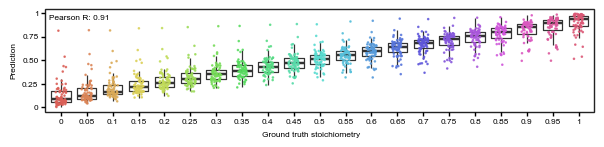

/home/yulab/anaconda3/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 7.08 x 1.33 in image.
/home/yulab/anaconda3/envs/TandemMod/lib/python3.7/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: figure/ac4C_stoichiometry.pdf


In [43]:
#site error, probability cutoff  0.5-0.5
import pandas as pd
from plotnine import *
files=["m5C_site_error/data_stoichiometry/mod_0",
                     "m5C_site_error/data_stoichiometry/mod_5",
                     "m5C_site_error/data_stoichiometry/mod_10",
                     "m5C_site_error/data_stoichiometry/mod_15",
                     "m5C_site_error/data_stoichiometry/mod_20",
                     "m5C_site_error/data_stoichiometry/mod_25",
                     "m5C_site_error/data_stoichiometry/mod_30",
                     "m5C_site_error/data_stoichiometry/mod_35",
                     "m5C_site_error/data_stoichiometry/mod_40",
                     "m5C_site_error/data_stoichiometry/mod_45",
                     "m5C_site_error/data_stoichiometry/mod_50",
                     "m5C_site_error/data_stoichiometry/mod_55",
                     "m5C_site_error/data_stoichiometry/mod_60",
                     "m5C_site_error/data_stoichiometry/mod_65",
                     "m5C_site_error/data_stoichiometry/mod_70",
                     "m5C_site_error/data_stoichiometry/mod_75",
                     "m5C_site_error/data_stoichiometry/mod_80",
                     "m5C_site_error/data_stoichiometry/mod_85",
                     "m5C_site_error/data_stoichiometry/mod_90",
                     "m5C_site_error/data_stoichiometry/mod_95",
                     "m5C_site_error/data_stoichiometry/mod_100"]

methods=[]
stoi_dict={0:"0",1:"0.05",2:"0.1",3:"0.15",4:"0.2",5:"0.25",
           6:"0.3",7:"0.35",8:"0.4",9:"0.45",10:"0.5",11:"0.55",
           12:"0.6",13:"0.65",14:"0.7",15:"0.75",16:"0.8",17:"0.85",
           18:"0.9",19:"0.95",20:"1"}
X,Y=[],[]
for i,ratio in enumerate([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1]):
    mod_rate_dict={}
    with open("data/stoichiometry/mix_%s.prediction" %ratio) as f:
        for j,line in enumerate(f):
            line=line.rstrip()
            id="_".join([line.split("\t")[0],line.split("\t")[1]])
            if id not in mod_rate_dict:
                mod_rate_dict[id]=[0,0]
            if line.split("\t")[4]=="m5C":
                mod_rate_dict[id][0]+=1
            mod_rate_dict[id][1]+=1
    for k,id in enumerate(mod_rate_dict):
        if mod_rate_dict[id][1]<20:
            continue
        if k%10==0:
            X.append(stoi_dict[i])
            Y.append(mod_rate_dict[id][0]/mod_rate_dict[id][1])
            methods.append("TandemMod")

data=pd.DataFrame({"Stoichiometry":X,"Predicted Stoichiometry":Y})

black = '#222222'
gray = '#666666'
red = '#FF3333'
green = '#66CC00'
blue = '#3333FF'
purple = '#9933FF'
orange = '#FF8000'
yellow = '#FFFF33'
salmen = "#FA8072"
limegreen = '#32CD32'
deepskyblue = '#00AFEE'
c1="#F8766D"
c2="#00BA38"
c3="#619CFF"

from scipy.stats import pearsonr
X=[float(x) for x in X]
r=pearsonr(X,Y)
print("Pearson R:",r)

p=(ggplot(data, aes(x='Stoichiometry', y='Predicted Stoichiometry'))
    + geom_boxplot(outlier_alpha=0)
    + geom_jitter(aes(x='Stoichiometry', y='Predicted Stoichiometry',color="Stoichiometry"),width = 0.2,size=0.05,alpha=0.8,show_legend=False)
    + annotate('text', x=1.7, y=0.95, label="Pearson R: 0.91", family='Arial',size=6)
    + scale_x_discrete()
    +theme(panel_background=element_rect(fill=gray, alpha=0),
            panel_grid_major=element_line(size=0.3, alpha=0,color=black),
            panel_grid_minor=element_line(size=0.3, alpha=0,color=black),
            panel_border=element_rect(color=black, size=1),
            axis_text=element_text(size=6,family="Arial",color="black"),
            axis_title_x=element_text(size=6,family="Arial",color="black"),
            axis_title_y=element_text(size=6,family="Arial",color="black"),
            plot_title=element_text(margin={'b': 1, 'r': 0, 'units': 'pt'},size=6,family="Arial",color="black"),
            figure_size=[3.54*2,1.33],
            legend_title = element_text(size=6), #change legend title font size
            legend_text = element_text(size=6),
            legend_background=element_rect(size=0.5,alpha=0),
            #legend_position=(0.45,0.3),
            legend_key_size=4) #change legend text font size)
   +labs(x="Ground truth stoichiometry",y="Prediction",title="")
   #+ylim([-0.5,0.3])
   )
    
print(p)
p.save("figure/ac4C_stoichiometry.pdf")

In [21]:
ratio=0.2
mod_rate_dict={}
with open("data/stoichiometry/mix_%s.prediction" %ratio) as f:
    for j,line in enumerate(f):
        line=line.rstrip()
        id="_".join([line.split("\t")[0],line.split("\t")[1]])
        if id not in mod_rate_dict:
            mod_rate_dict[id]=[0,0]
        if line.split("\t")[4]=="m5C":
            mod_rate_dict[id][0]+=1
        mod_rate_dict[id][1]+=1

In [22]:
mod_rate_dict

{'cc6m_2709_t7_ecorv_1539': [82, 400],
 'cc6m_2709_t7_ecorv_1551': [117, 400],
 'cc6m_2709_t7_ecorv_1599': [88, 400],
 'cc6m_2709_t7_ecorv_1605': [102, 400],
 'cc6m_2709_t7_ecorv_1612': [106, 400],
 'cc6m_2709_t7_ecorv_1613': [144, 400],
 'cc6m_2709_t7_ecorv_1614': [92, 400],
 'cc6m_2709_t7_ecorv_1628': [97, 400],
 'cc6m_2709_t7_ecorv_1629': [96, 400],
 'cc6m_2709_t7_ecorv_1633': [124, 400],
 'cc6m_2709_t7_ecorv_1651': [120, 400],
 'cc6m_2709_t7_ecorv_1653': [156, 400],
 'cc6m_2709_t7_ecorv_1661': [92, 400],
 'cc6m_2709_t7_ecorv_1662': [73, 400],
 'cc6m_2709_t7_ecorv_1665': [168, 400],
 'cc6m_2709_t7_ecorv_1666': [161, 400],
 'cc6m_2709_t7_ecorv_1674': [109, 400],
 'cc6m_2709_t7_ecorv_1677': [91, 400],
 'cc6m_2709_t7_ecorv_1684': [139, 400],
 'cc6m_2709_t7_ecorv_1687': [163, 400],
 'cc6m_2709_t7_ecorv_1697': [91, 400],
 'cc6m_2709_t7_ecorv_1701': [142, 400],
 'cc6m_2709_t7_ecorv_1702': [123, 400],
 'cc6m_2709_t7_ecorv_1703': [108, 400],
 'cc6m_2709_t7_ecorv_1715': [91, 400],
 'cc6m_270